## Numpy sample analysis

In [3]:
import numpy as np
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    # iterate over each class (0,1)
    # count (sum) entries of 1 per feature
    print (X[y == label], label)
    counts[label] = X[y == label].sum(axis=0)
print ("Feature counts :\n{}".format(counts))

[[0 1 0 1]
 [0 0 0 1]] 0
[[1 0 1 1]
 [1 0 1 0]] 1
Feature counts :
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


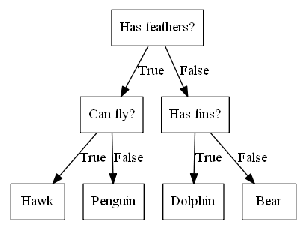

In [4]:
import mglearn
mglearn.plots.plot_animal_tree()

In [5]:
## imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

## loading cancer data
cancer = load_breast_cancer()

## assigning training and test variables
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                    stratify=cancer.target, random_state=42)

## Model selection and assigning
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

## Scores
print ("Accuracy on training set : {:.3f}".format(tree.score(X_train, y_train)))
print ("Accuracy on testingg set : {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set : 1.000
Accuracy on testingg set : 0.937


## After pre-pruning these models 

In [6]:
tree_4 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_4.fit(X_train, y_train)

## Scores
print ("Accuracy on training set : {:.3f}".format(tree_4.score(X_train, y_train)))
print ("Accuracy on testingg set : {:.3f}".format(tree_4.score(X_test, y_test)))


Accuracy on training set : 0.988
Accuracy on testingg set : 0.951


In [7]:
from sklearn.tree import export_graphviz
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

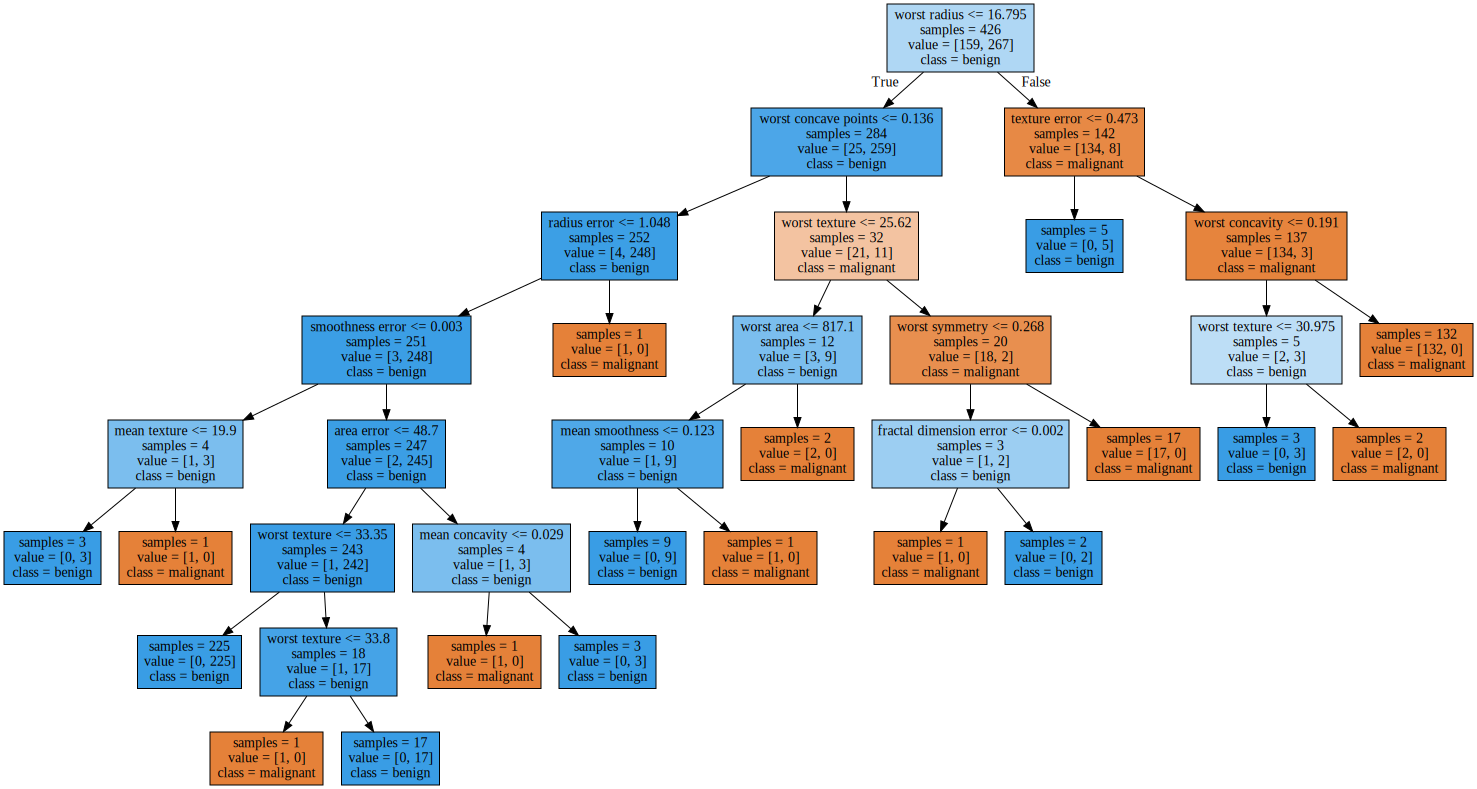

In [8]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## Feature importance of this tree

In [10]:
print ("Feature importance : \n{}".format(tree_4.feature_importances_))

Feature importance : 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


## Visualizing

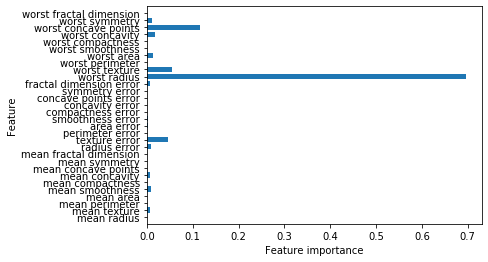

In [11]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


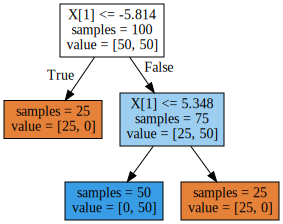

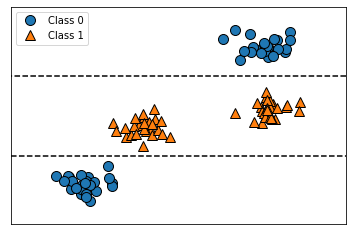

In [12]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

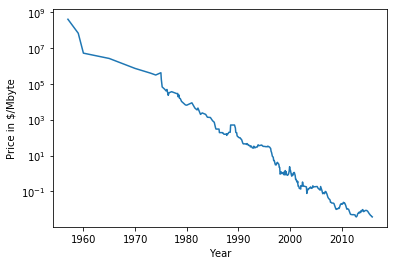

In [13]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,
                                     "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

## Evaluating LinearRegression v DecisionTreeRegressor

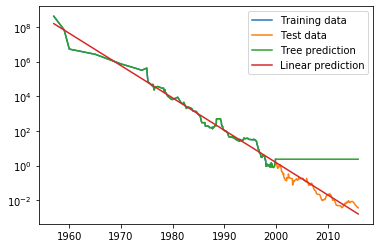

In [14]:
## input data from the above dataframe
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

##predictions
#print (np.newaxis)
X_train = data_train.date[:, np.newaxis]
#print (X_train)
y_train = np.log(data_train.price)
#print (y_train)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

#predicting test
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

## removing log
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

## plotting the graph by log
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend(loc="upper right")

## Random Forest

In [15]:
## moons dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

## forest prediction
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

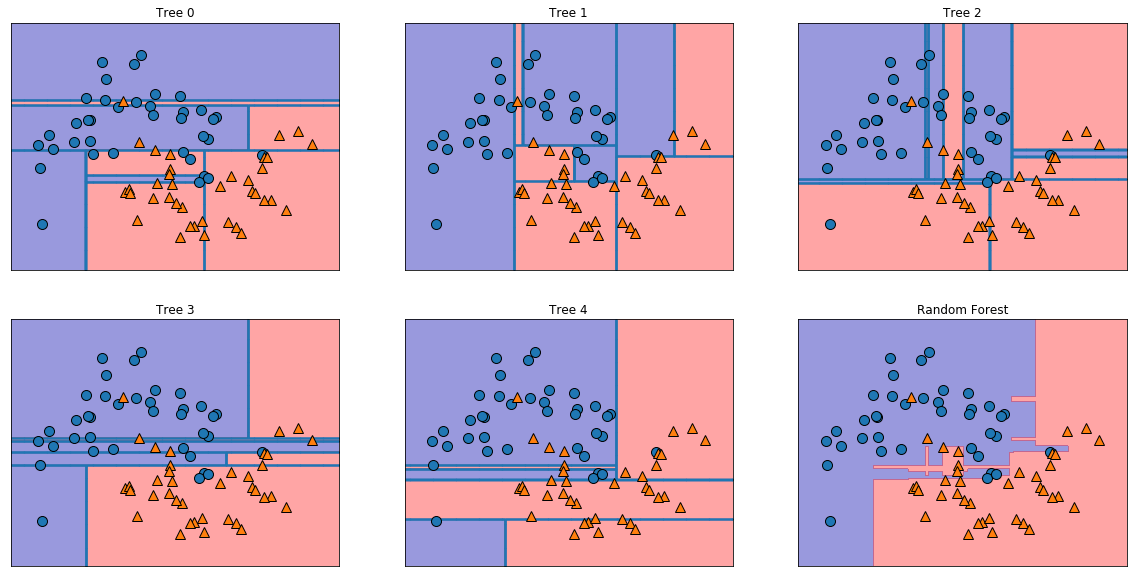

In [16]:
## plotting
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                               alpha=0.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print ("Accuracy of training data : {:.3f}".format(forest.score(X_train, y_train)))
print ("Accuracy on teesting data : {:.3f}".format(forest.score(X_test, y_test)))


Accuracy of training data : 1.000
Accuracy on teesting data : 0.972


Visualize the random forest features

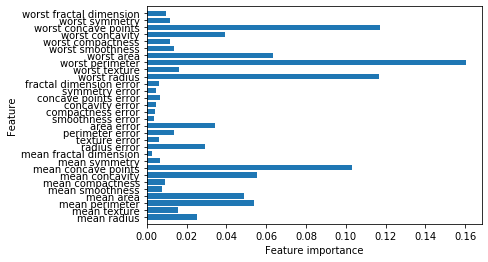

In [18]:
plot_feature_importances_cancer(forest)

## Gradient Boosted Regression (both classification and regression)

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

## assigning cancer variable from breast cancer data
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

##scores
print ("Accuracy on training set : {:.3f}".format(gbrt.score(X_train, y_train)))
print ("Accuracy on test set : {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set : 1.000
Accuracy on test set : 0.965


## to get better generalization accuracy

Trying out with max_depth=1

In [20]:
gbrt_1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt_1.fit(X_train, y_train)

print ("Accuracy on train : {:.3f}".format(gbrt_1.score(X_train, y_train)))
print ("Test accuracy : {:.3f}".format(gbrt_1.score(X_test, y_test)))

Accuracy on train : 0.991
Test accuracy : 0.972


Try with learning_rate = 0.01

In [21]:
gbrt_01 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt_01.fit(X_train, y_train)

print ("Accuracy on train : {:.3f}".format(gbrt_01.score(X_train, y_train)))
print ("Test accuracy : {:.3f}".format(gbrt_01.score(X_test, y_test)))

Accuracy on train : 0.988
Test accuracy : 0.965


Visualize the gradient boosted regression model

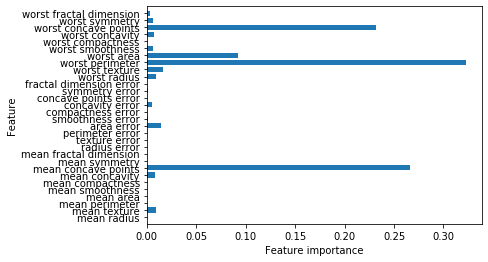

In [22]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)
#plot_feature_importances_cancer(gbrt_1)
#plot_feature_importances_cancer(gbrt_01)

## Support Vector Machines

### Linear and Non-linear models 

Text(0, 0.5, 'Feature 1')

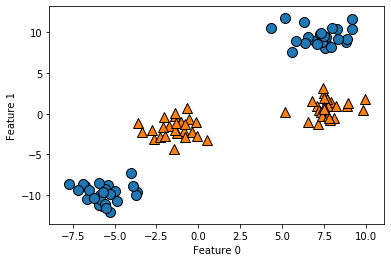

In [25]:
import mglearn, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

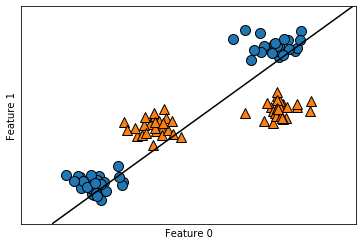

In [26]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### adding a new feature as feature1 ** 2

Text(0.5, 0, 'Feature 1 ** 2')

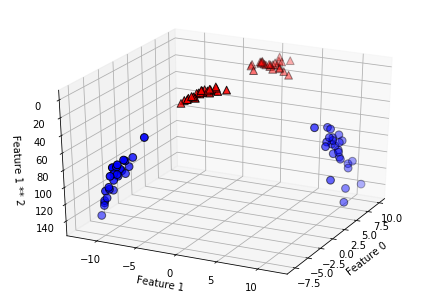

In [47]:
import matplotlib.pyplot as plt
X_new = np.hstack([X, X[:, 1:] ** 2])
#print (X_new[:5])
#print (X[:5])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3d visualization

ax = Axes3D(figure, elev=-152, azim=-26)

# plot for y == 0 then for y == 1 for better 3d visualization
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c = 'b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c = 'r', marker = '^',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

#### segregating the planes visually

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in power
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  from ipykernel import kernelapp as app


Text(0.5, 0, 'Feature 1 ** 2')

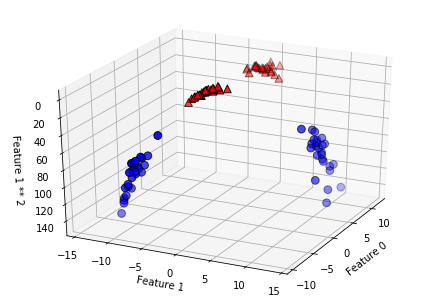

In [48]:
import numpy as np, mglearn
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

#X_new[:5, 1:2]
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

## defining Z = nX + mY + C and making a scatter of it
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] ** YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')

## setting labels
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

#### perhaps a better mode of visuals

Text(0, 0.5, 'Feature 1')

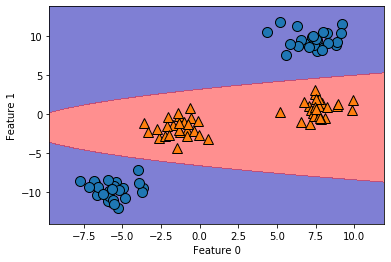

In [49]:
import numpy as np, mglearn, matplotlib.pyplot as plt
ZZ = YY ** 2

dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### kernel tricks
Although the above models make a better prediction compared to 2 dimensional scaling, there are ways when we are not aware of which feature to add and how many features to add (imagine a 100 dimensional space) which would make computation expensive. Luckily, we can use _kernel trick_ which works directly by computing the distance (more precisely the scalar products) of the data points for expanded feature representation.

2 ways to achieve kernel trick (mapping data into a higher-dimensional space),
* Polynomial Kernel - Computes all possible polynomials upto a certain degree (viz., feature1 ** 2)
* Gaussian Kernel / Radial Basis Function (RBF) - This corresponds to an infinite-dimensional space. It considers all possible polynomials of all degrees and ignores the importance of features decreases for higher degrees. 
We can how this RBF kernel makes a decision below

#### Support vectors
For classifying data points between classes, usually a subset of training points matter for defining the decision boundary: the ones that lie **ON** the border between the classes. These are the Support Vectors. 

For predicting new data point, distance of each of the support vectors are measured. A classification decision is made based on the distances to the support vector, and the importance of the support vectors that was learned during training (stored in dual_coef_ attribute of SVC)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]] [1 0 1 0 0]
[[ 8.1062269   4.28695977]
 [ 9.50169345  1.93824624]
 [11.563957    1.3389402 ]
 [10.24028948  2.45544401]
 [ 7.99815287  4.8525051 ]]
[False False False  True  True]


Text(0, 0.5, 'Feature 1')

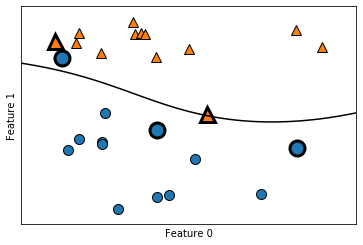

In [53]:
#from sklearn.datasets import make_forge
from sklearn.svm import SVC
import mglearn, matplotlib.pyplot as plt

X, y = mglearn.tools.make_handcrafted_dataset()
print (X[:5], y[:5])
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

##plotting sv 
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0

print (sv)
print (sv_labels)

mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

We can see from the above graph, a smooth non-linear(Polynomial) decision boundary is obtained. However, we used 2 parameters, viz., C and gamma for pruning the model.

#### Tuning SVM parameters for better pruning

The *gamma* parameter shown in the previous block, corresponds to the inverse of the width of Gaussian Kernel. It determines how far the influence of a single training reaches with low values corresponding to far reach and high values to limited reach. Put in other words, the wider the radius of the Gaussian Kernel, the further the influence of each training example.

The *C* parameter is a regularization parameter, similar to the one used in linear models. This is more about dual_coef_ which limits the importance of each point.

Lets see what happens when we vary them off

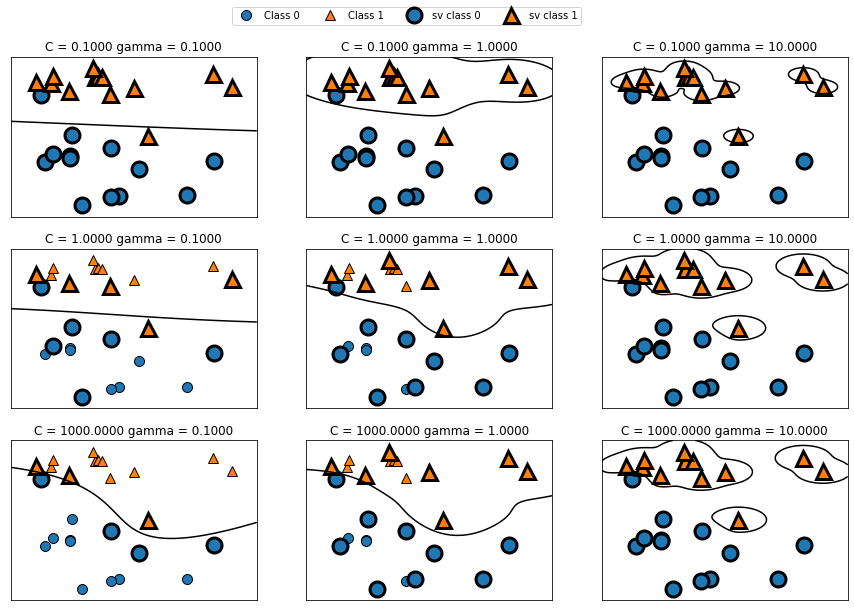

In [54]:
import matplotlib.pyplot as plt, mglearn

fig, axes = plt.subplots(3, 3, figsize = (15,10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["Class 0", "Class 1", "sv class 0", "sv class 1"],
                 ncol=4, loc=(.9,1.2))

We can see from the above graphs,
* Increasing the value of gamma - tends to make the model more complex and that a small value of gamma means the gaussian radius is very high and that means this considers many close by data points.
* Increasing the value of C - tends to make the model more accurate

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

print ("Accuracy of train data : {:.2f}".format(svc.score(X_train, y_train)))
print ("Accuracy of test data : {:.2f}".format(svc.score(X_test, y_test)))

Accuracy of train data : 1.00
Accuracy of test data : 0.63


We can see that the model clearly overfits which resulted in poor generalization accuracy. So lets look at varying parameters, for that lets see the minimum and maximum values for each feature.

Text(0, 0.5, 'Feature magnitude')

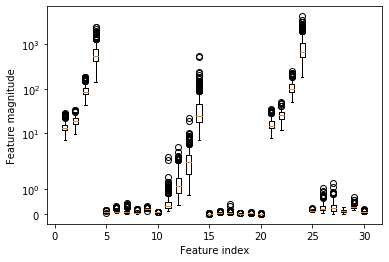

In [59]:
import matplotlib.pyplot as plt

plt.boxplot(X_train, manage_ticks=False)
## in older versions of matplotlib, use the second parameter as manage_xticks (as this was renamed to manage_ticks)

plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

We can see that features in Breast cancer dataset are of completely different orders of magnitude. This is a problem for linear models but will have devasting effect for Kernel SVM. Lets see how we can examine ways to deal with this.

#### preprocessing data for SVMs
We can resolve the problem by, rescaling each feature so they are approximately on the same scale. 
A common method to rescale the Kernel SVMs is to scale the data such that all features are between 0 and 1. We will see more about this in Chapter "MinMaxScaler" 

In [61]:
from sklearn.datasets import load_breast_cancer
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

## computing the minimum and range value per feature
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

## subtracting min and divide by range; afterward min=0 and max=1
X_train_scaled = (X_train - min_on_training) / range_on_training

print ("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print ("Maximum for each feature\n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [64]:
from sklearn.svm import SVC
## using the same transformation for test set,
X_test_scaled = (X_test - min_on_training) / range_on_training

## now use SVM on the scaled values
svc = SVC(gamma='auto')
svc.fit(X_train_scaled, y_train)

##accuracies
print ("Accuracy on train data : {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print ("Test accuracy : {:.3f}".format(
        svc.score(X_test_scaled, y_test)))

Accuracy on train data : 0.948
Test accuracy : 0.951


We can see that scaling the data made a huge difference on the model performance. And since the test accuracy quite matches with train accuracy and less than 100%, we are underfitting the model. Now, we can try to increase either *C* or *gamma* for a complex model fitting.

In [77]:
from sklearn.svm import SVC

svc_1000 = SVC(C=1000, gamma = 'auto')
svc_1000.fit(X_train_scaled, y_train)

##accuracies
print ("Accuracy on train data : {:.3f}".format(
        svc_1000.score(X_train_scaled, y_train)))
print ("Test accuracy : {:.3f}".format(
        svc_1000.score(X_test_scaled, y_test)))

Accuracy on train data : 0.988
Test accuracy : 0.972


We can see that model did perform well when we increased C.

**Take aways** :

* Strengths - 
1) Kernalized SVMs are powerful and perform well on a variety of datasets.
2) They allow for complex decision boundaries, even if the data has only a few features.
3) They work well on both low-dimensional and high-dimensional data (few and many features) but don't scale well with number of samples.
4) Running an SVM with 10k features might work well but not for 100k features.
5) It might be worthy trying SVMs if all our features represent measurements in similar units (eg. pixel intensities) when they are on similar scales.

* Weakness - 
1) They require careful preprocessing of data and pruning of parameters.
2) Hence, its better to use Gradient Boosting or Random Forests for their computational performance.
3) Adding to this, SVM are hard to inspect; it is difficult to understand why a prediction was made and it might be tricky to explain the model to a nonexpert.

* Parameters -
1) Regularization parameter, C 
2) Choice of kernel (RBF v Polynomial)
3) kernel-specific parameters (viz., C and gamma - large values resulting in more complex model)    